<a href="https://colab.research.google.com/github/BenGardiner18/Fran-ois-Chollet-Deep-Learning-with-Python/blob/main/ch4_IMDB_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading IMBD dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)


# labels 
# 1 positive 
# 0 negative

In [ ]:
train_data.shape # 25000 reviews

(25000,)

In [ ]:
# decoding review from array to text
word_index = imdb.get_word_index()
reverse_word_index = dict( 
    [(value, key) for (key, value) in word_index.items()]) 
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print("original: ",train_data[0])
print("original label: ",train_labels[0])
print("decoded: ",decoded_review)

original:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
original label:  1
decoded:  ? this film was just

In [ ]:
# encoding integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): 
    for j in sequence:
      results[i, j] = 1. 
  return results

# converting data into matrix 
# original data: list of arrays where each arrow contains the order and index of works 
# new data: matrix where each row is a review and column is a word the cell is 1 if word is in review
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train\n",x_train)

x_train
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
# vecotorizing labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# defining model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid") # likelihood of being positive (1 - positive and 0 - negative)
])

In [ ]:
# compiling model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# entire data (25,000 x 10,000)
print("training data size: ",x_train.shape)

# separating training data into fitting data and validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("partial training data size: ",partial_x_train.shape)
print("training validation data size: ",x_val.shape)

training data size:  (25000, 10000)
partial training data size:  (15000, 10000)
training validation data size:  (10000, 10000)


In [ ]:
# training model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5348 - accuracy: 0.7825 - val_loss: 0.4134 - val_accuracy: 0.8512
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3249 - accuracy: 0.9039 - val_loss: 0.3196 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2284 - accuracy: 0.9319 - val_loss: 0.2843 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1773 - accuracy: 0.9454 - val_loss: 0.2925 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1428 - accuracy: 0.9557 - val_loss: 0.2935 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1154 - accuracy: 0.9668 - val_loss: 0.3062 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0984 - accuracy: 0.9710 - val_loss: 0.3190 - val_accuracy: 0.8849
Epoch 8/20
30

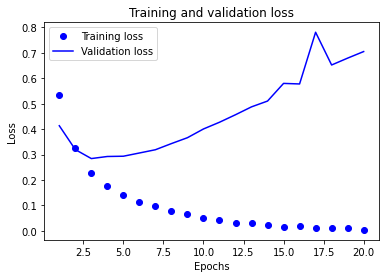

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


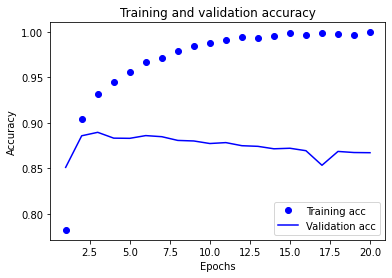

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Looking at the loss and accuracy plots the validation loss is lowest and accuracy is highest at around 3 epochs. Even though the accuracy keeps increasing for the training data it's only increasing because it's overfitting the training data and NOT what we're hoping to model.

In [ ]:
# refitting model with 3 epochs
model.fit(x_test, y_test, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
print("loss: ",results[0],"accuracy: ",results[1])

Epoch 1/3
49/49 [==============================] - 1s 29ms/step - loss: 0.4895 - accuracy: 0.8573
Epoch 2/3
49/49 [==============================] - 2s 34ms/step - loss: 0.2656 - accuracy: 0.8958
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.1758 - accuracy: 0.9340
loss:  0.17582546174526215 accuracy:  0.9340400099754333


In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.02533541],
       [0.99999964],
       [0.9172127 ],
       ...,
       [0.03413575],
       [0.01230486],
       [0.04717769]], dtype=float32)